# Decision Trees and Random Forests

<hr>

## Import Libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
%matplotlib inline
sns.set_style('whitegrid')

<hr>

## Get Data

In [36]:
df = pd.read_csv('files/kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## Exploratory Data Analysis

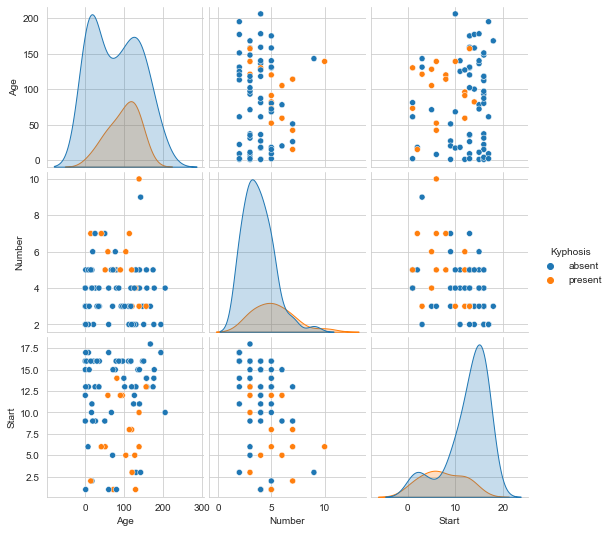

In [37]:
sns.pairplot(df, hue='Kyphosis')

<hr>

## Train Test Split

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

<hr>

## Decision Trees

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
dtree = DecisionTreeClassifier()

In [43]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

### Prediction and Evaluation

In [44]:
predictions = dtree.predict(X_test)

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
print(confusion_matrix(y_test, predictions))

[[17  3]
 [ 3  2]]


In [48]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      absent       0.85      0.85      0.85        20
     present       0.40      0.40      0.40         5

    accuracy                           0.76        25
   macro avg       0.62      0.62      0.62        25
weighted avg       0.76      0.76      0.76        25



### Tree Visualization

In [72]:
from sklearn.tree import plot_tree

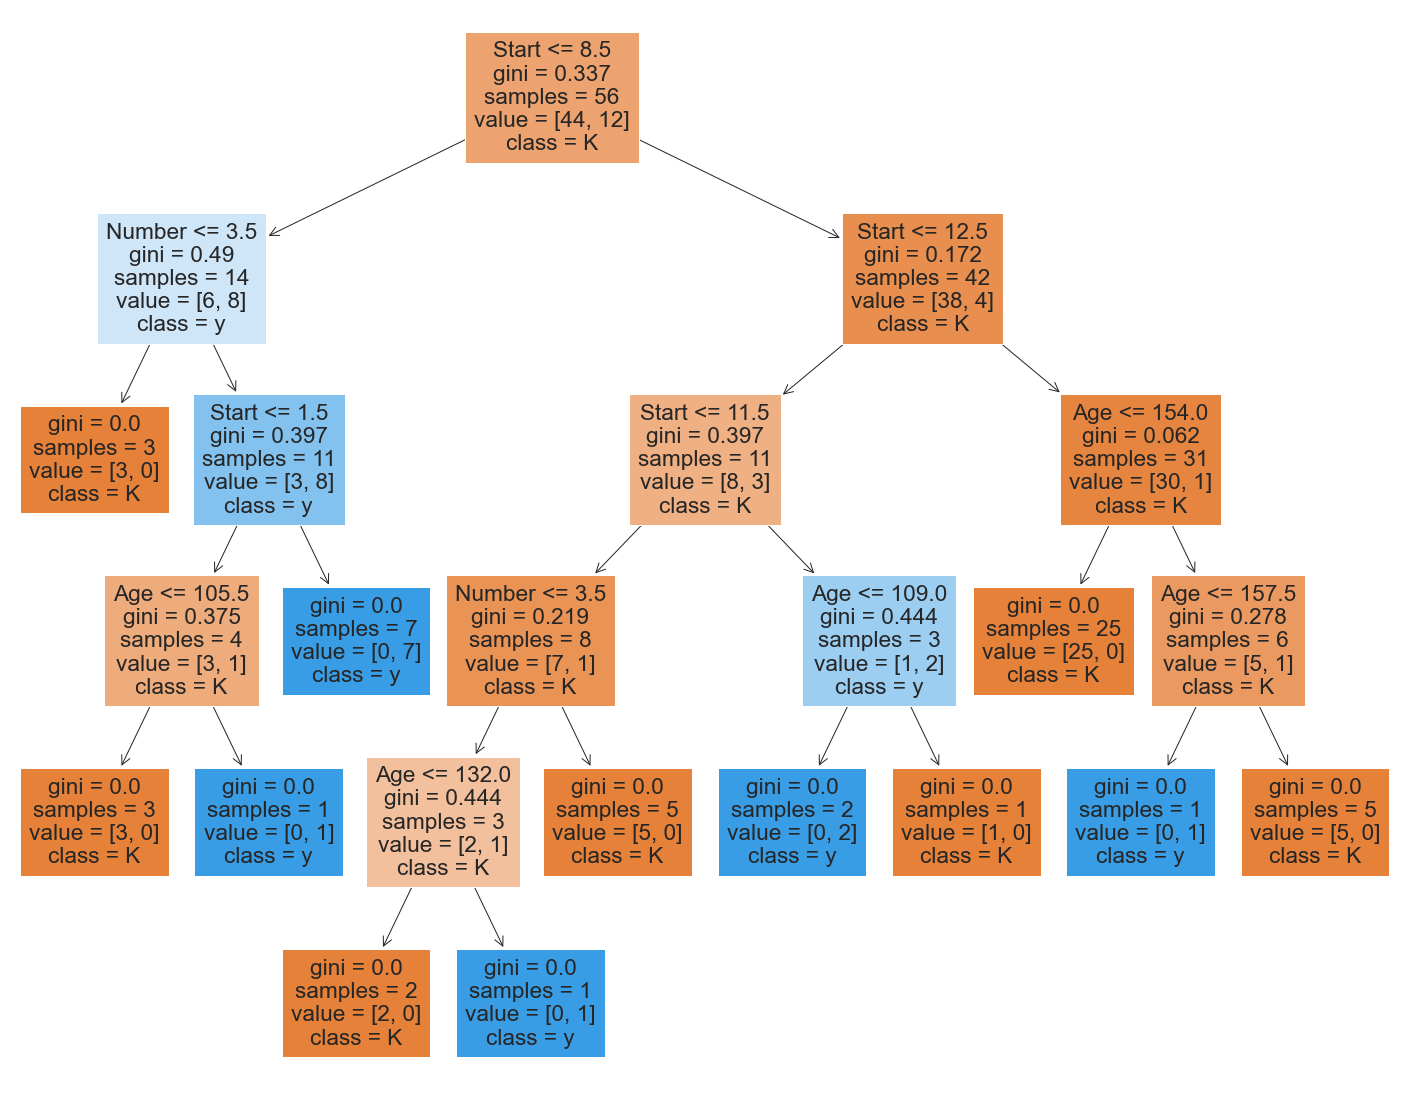

In [75]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(dtree, 
              feature_names=X.columns,  
              class_names='Kyphosis',
              filled=True)

<hr>

## Random Forests

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
rfc = RandomForestClassifier(n_estimators=100)

In [78]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [79]:
rfc_pred = rfc.predict(X_test)

In [80]:
print(confusion_matrix(y_test,rfc_pred))

[[18  2]
 [ 4  1]]


In [81]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.82      0.90      0.86        20
     present       0.33      0.20      0.25         5

    accuracy                           0.76        25
   macro avg       0.58      0.55      0.55        25
weighted avg       0.72      0.76      0.74        25



<hr>